In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [89]:
Kp = 10
Ki = 0.001
Kd = 0

In [90]:
integral = 0
previous_error = 0
theta_reference = 0

In [91]:
def pid_control(theta, frequence):
  global integral, previous_error, theta_reference
  error = theta - theta_reference

  integral += error / frequence
  derivative = (error - previous_error) * frequence

  u = Kp * error + Ki * integral + Kd * derivative

  previous_error = error

  return u

In [92]:
frequence = 1000
def inverted_pendulum(y, t):
  global frequence

  M = 0.500
  m = 0.200
  l = 0.3
  I = 0.006
  g = 9.81
  b = 0.1

  x, dx, phi, dphi = y

  u = pid_control(phi, frequence)

  sen_phi = np.sin(phi)
  cos_phi = np.cos(phi)

  beta = m*l
  beta_sin = beta*sen_phi
  beta_cos = beta*cos_phi
  alpha = I + beta*l
  gama = M + m
  ddx = (u + beta**2/gama*sen_phi*cos_phi + beta*dphi*dphi*sen_phi - b*dx) /(gama - beta*beta * cos_phi * cos_phi)
  ddphi = -beta*g*sen_phi/alpha - beta*ddx*cos_phi/alpha
  return [dx, ddx, dphi, ddphi]

In [93]:
x = 0.00
dx = 0.01
phi = 0.001
dphi = 0.001
y0 = [x, dx, phi, dphi]

In [94]:
t = np.linspace(0, 10, frequence)
y = odeint(inverted_pendulum, y0, t)

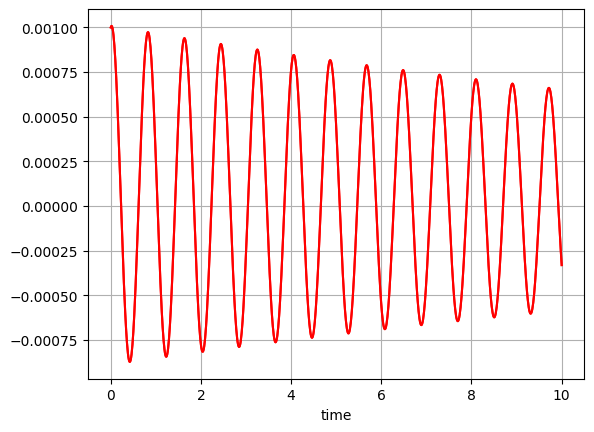

In [95]:
plt.plot(t, y[:,2], 'r')
plt.plot(t, y[:,2], 'r')
plt.xlabel('rad')
plt.xlabel('time')
plt.grid()
plt.show()